<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,85.384510,45.960799,4358.661154,4500.006463,440.104504,4059.901959
1,0.0,1.0,73.787049,20.124942,550.177451,654.089442,-468.898750,1122.988192
2,0.0,2.0,73.954115,47.696361,-140.277956,-8.627480,329.382353,-338.009833
3,0.0,3.0,82.310579,53.355289,1907.844701,2053.510569,610.318451,1443.192118
4,0.0,4.0,34.985576,71.747955,-1808.634654,-1691.901123,475.419983,-2167.321106
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,93.894053,30.260496,2242.211505,2376.366054,244.567586,2131.798468
249996,999.0,246.0,23.476801,28.830119,468.423227,530.730147,-195.697650,726.427797
249997,999.0,247.0,35.659016,93.600236,18677.313426,18816.572678,-39.423918,18855.996597
249998,999.0,248.0,25.096037,32.004309,522.571472,589.671818,-181.673749,771.345567


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2             e             Y       y_hat  \
rep   index                                                                 
0.0   0.0    85.384510  45.960799   4358.661154   4500.006463  440.104504   
      1.0    73.787049  20.124942    550.177451    654.089442 -468.898750   
      2.0    73.954115  47.696361   -140.277956     -8.627480  329.382353   
      3.0    82.310579  53.355289   1907.844701   2053.510569  610.318451   
      4.0    34.985576  71.747955  -1808.634654  -1691.901123  475.419983   
...                ...        ...           ...           ...         ...   
999.0 245.0  93.894053  30.260496   2242.211505   2376.366054  244.567586   
      246.0  23.476801  28.830119    468.423227    530.730147 -195.697650   
      247.0  35.659016  93.600236  18677.313426  18816.572678  -39.423918   
      248.0  25.096037  32.004309    522.571472    589.671818 -181.673749   
      249.0  80.986000  48.360920   2784.896894   2924.243814  186.661386   

                    e_hat  
rep   index                
0.0   0.0     4059.901959  
      1.0     1122.988192  
      2.0     -338.009833  
      3.0     1443.192118  
      4.0    -2167.321106  
...                   ...  
999.0 245.0   2131.798468  
      246.0    726.427797  
      247.0  18855.996597  
      248.0    771.345567  
      249.0   2737.582428  

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2             e             Y       y_hat  \
rep   index                                                                 
0.0   0.0    85.384510  45.960799   4358.661154   4500.006463  440.104504   
      1.0    73.787049  20.124942    550.177451    654.089442 -468.898750   
      2.0    73.954115  47.696361   -140.277956     -8.627480  329.382353   
      3.0    82.310579  53.355289   1907.844701   2053.510569  610.318451   
      4.0    34.985576  71.747955  -1808.634654  -1691.901123  475.419983   
...                ...        ...           ...           ...         ...   
999.0 245.0  93.894053  30.260496   2242.211505   2376.366054  244.567586   
      246.0  23.476801  28.830119    468.423227    530.730147 -195.697650   
      247.0  35.659016  93.600236  18677.313426  18816.572678  -39.423918   
      248.0  25.096037  32.004309    522.571472    589.671818 -181.673749   
      249.0  80.986000  48.360920   2784.896894   2924.243814  186.661386   

                    e_hat  
rep   index                
0.0   0.0     4059.901959  
      1.0     1122.988192  
      2.0     -338.009833  
      3.0     1443.192118  
      4.0    -2167.321106  
...                   ...  
999.0 245.0   2131.798468  
      246.0    726.427797  
      247.0  18855.996597  
      248.0    771.345567  
      249.0   2737.582428  

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,85.384510,45.960799,4358.661154,4500.006463,440.104504,4059.901959
1,0.0,1.0,73.787049,20.124942,550.177451,654.089442,-468.898750,1122.988192
2,0.0,2.0,73.954115,47.696361,-140.277956,-8.627480,329.382353,-338.009833
3,0.0,3.0,82.310579,53.355289,1907.844701,2053.510569,610.318451,1443.192118
4,0.0,4.0,34.985576,71.747955,-1808.634654,-1691.901123,475.419983,-2167.321106
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,93.894053,30.260496,2242.211505,2376.366054,244.567586,2131.798468
249996,999.0,246.0,23.476801,28.830119,468.423227,530.730147,-195.697650,726.427797
249997,999.0,247.0,35.659016,93.600236,18677.313426,18816.572678,-39.423918,18855.996597
249998,999.0,248.0,25.096037,32.004309,522.571472,589.671818,-181.673749,771.345567


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2             e             Y       y_hat  \
rep   index                                                                 
0.0   0.0    85.384510  45.960799   4358.661154   4500.006463  440.104504   
      1.0    73.787049  20.124942    550.177451    654.089442 -468.898750   
      2.0    73.954115  47.696361   -140.277956     -8.627480  329.382353   
      3.0    82.310579  53.355289   1907.844701   2053.510569  610.318451   
      4.0    34.985576  71.747955  -1808.634654  -1691.901123  475.419983   
...                ...        ...           ...           ...         ...   
999.0 245.0  93.894053  30.260496   2242.211505   2376.366054  244.567586   
      246.0  23.476801  28.830119    468.423227    530.730147 -195.697650   
      247.0  35.659016  93.600236  18677.313426  18816.572678  -39.423918   
      248.0  25.096037  32.004309    522.571472    589.671818 -181.673749   
      249.0  80.986000  48.360920   2784.896894   2924.243814  186.661386   

                    e_hat  
rep   index                
0.0   0.0     4059.901959  
      1.0     1122.988192  
      2.0     -338.009833  
      3.0     1443.192118  
      4.0    -2167.321106  
...                   ...  
999.0 245.0   2131.798468  
      246.0    726.427797  
      247.0  18855.996597  
      248.0    771.345567  
      249.0   2737.582428  

[250000 rows x 6 columns]

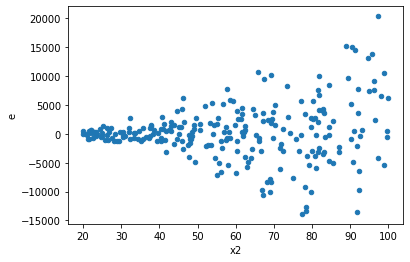

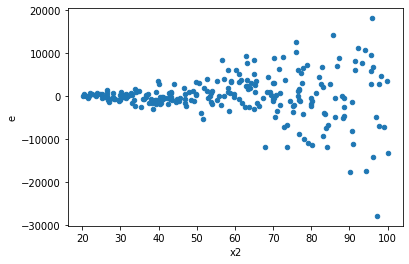

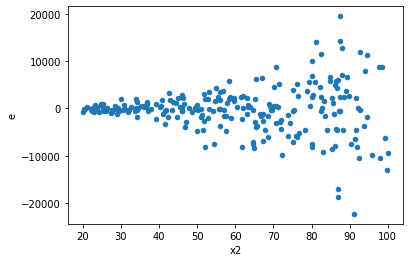

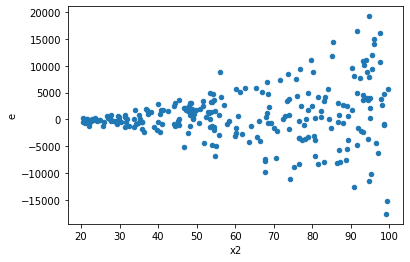

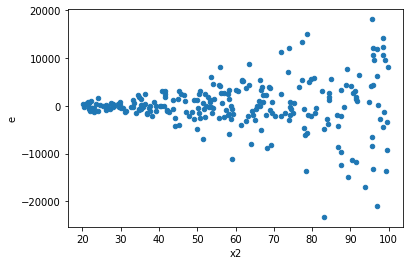

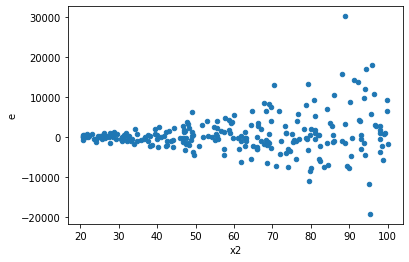

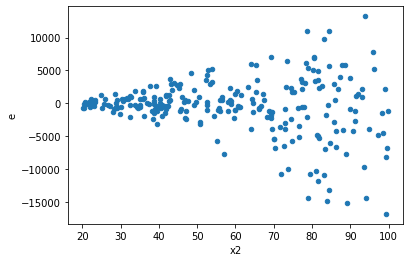

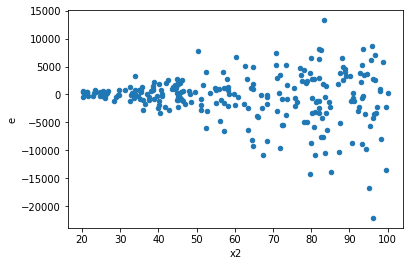

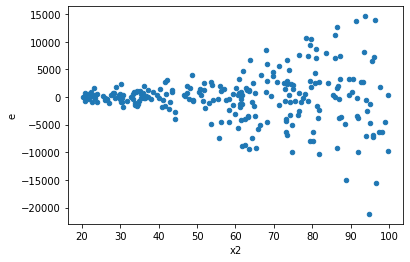

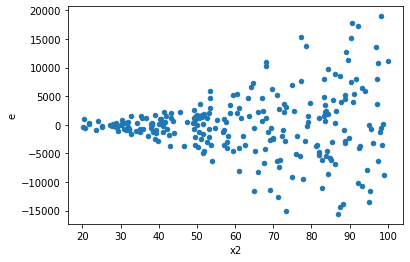

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,127.0,119.0,2352913574.3951144,3282852648.107086,18526878.538544208,27586997.04291669,1.4890256329755374,0.028653529931011334,0.9856732350344943,0.014326764965505667,Reject001=1 : Homoscedasticity
2.0,112.0,134.0,2473365751.304784,3529651890.0712337,22083622.779507,26340685.74680025,1.1927701360323764,0.32760756671229263,0.8361962166438537,0.16380378335614632,Reject001=1 : Homoscedasticity
6.0,118.0,128.0,1764117685.9915,2563601488.867012,14950149.881283898,20028136.63177353,1.3396612603092874,0.10530208230944238,0.9473489588452788,0.05265104115472119,Reject001=1 : Homoscedasticity
8.0,139.0,107.0,2631932613.925462,2564890485.5379057,18934767.006658,23970939.11717669,1.265974865639901,0.20120254370496538,0.8993987281475173,0.10060127185248269,Reject001=1 : Homoscedasticity
12.0,136.0,110.0,633928357.1808627,5837678953.186926,4661237.92044752,53069808.66533569,11.38534646183444,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
17.0,118.0,128.0,365010884.02830184,5637358835.973542,3093312.5765110324,44041865.9060433,14.237767705880668,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
19.0,111.0,135.0,511215863.97289956,8413116988.806854,4605548.324080176,62319385.102272995,13.531371449613326,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
20.0,122.0,124.0,1804045240.0569816,4617004617.839573,14787256.066040833,37233908.20838365,2.5179727761590542,4.899001335711972e-07,0.9999997550499332,2.449500667855986e-07,Reject001=0 : Heteroscedasticity
21.0,104.0,142.0,2066121987.5294216,3484856903.340597,19866557.572398283,24541245.79817322,1.2353043907450652,0.24198931003185975,0.8790053449840701,0.12099465501592988,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,127.0,119.0,2352913574.3951144,3282852648.107086,18526878.538544208,27586997.04291669,1.4890256329755374,0.028653529931011334,Reject001=1 : Homoscedasticity
1.0,128.0,118.0,3430714508.304465,2650013944.0037575,26802457.09612863,22457745.288167436,0.8378987496415488,0.3266383995940027,Reject001=1 : Homoscedasticity
2.0,112.0,134.0,2473365751.304784,3529651890.0712337,22083622.779507,26340685.74680025,1.1927701360323764,0.32760756671229263,Reject001=1 : Homoscedasticity
3.0,119.0,127.0,5598784737.155003,591618549.4069343,47048611.23659666,4658413.77485775,0.0990127796000536,5.94066876287918e-31,Reject001=0 : Heteroscedasticity
4.0,111.0,135.0,3240434911.5791345,3596499166.175928,29193107.311523736,26640734.564266134,0.9125693363155599,0.6190765893386182,Reject001=1 : Homoscedasticity
5.0,122.0,124.0,5231967254.06222,416719523.52296793,42884977.49231327,3360641.3187336125,0.07836406861437611,1.2412183339548012e-36,Reject001=0 : Heteroscedasticity
6.0,118.0,128.0,1764117685.9915,2563601488.867012,14950149.881283898,20028136.63177353,1.3396612603092874,0.10530208230944238,Reject001=1 : Homoscedasticity
7.0,118.0,128.0,2651182160.7846766,1785867497.3006008,22467645.430378616,13952089.822660943,0.6209858467766388,0.009015878930899893,Reject001=0 : Heteroscedasticity
8.0,139.0,107.0,2631932613.925462,2564890485.5379057,18934767.006658,23970939.11717669,1.265974865639901,0.20120254370496538,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    664
Reject001=1 : Homoscedasticity      336
Name: Result_test, dtype: int64